In [1]:
import numpy as np
import scipy
from qutip import *
from numba import jit, njit
from scipy.signal import find_peaks, peak_widths

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import plot
import plotly.graph_objs as go

In [194]:
#DELTA_0 FREQUENCY SWEEP (SWEEP ON OMEGA_ZPL)


#gS = 2*np.pi * 15.0

#arr_gS = 2*np.pi * np.array([.1,8,10,15])
arr_gS = 2*np.pi * np.array([.0,.25,.5, 1,2, 3, 5, 8, 10, 14])
arr_gS_rho = []
arr_gS_g2 = []
for indxS, gS in enumerate(arr_gS):

    gamma_opt = 2*np.pi * 0.04    #frequencies in GHz
    Delta_opt = 2*np.pi * 0
    kappa_opt = 2*np.pi * .0

    gamma_v = 2*np.pi * 20.
    Delta_v = -2*np.pi * 0
    n_th = 0
    kappa_v = 2*np.pi * 0.

    Nvib = 6
    sig = tensor( sigmam(), qeye(Nvib))
    b = tensor(qeye(2), destroy(Nvib))


    gAS_incoh = 2*np.pi * 0.0
    Gamma_plus = gAS_incoh**2/(2*gamma_v) 


    Om_opt = 2*np.pi * .1
    Om_THz =  2*np.pi * 0.
    
    eff_shift = 2*np.pi * 0

    arr_Delta = 2*np.pi * np.linspace(-50., 50., 600)

    arr_g2 = []
    arr_rho_ee = []
    for Delta_opt in arr_Delta:
        T_v = 2*np.pi/gamma_v*0+.1
    
        theta = np.pi/2 * .05
        H0 = -Delta_opt*b.dag()*b + Delta_opt*sig.dag()*sig + Om_opt/2*( np.exp(1j*theta)*sig + np.exp(-1j*theta)*sig.dag() ) + Om_THz*( np.exp(1j*theta)*b + np.exp(-1j*theta)*b.dag() )

        Hasymm = eff_shift* (b.dag() * b) * sig.dag()*sig

        H_S = 0*gS/2.*( sig*b.dag() + sig.dag()*b )
        H_AS = gS/2.*( sig*b + sig.dag()*b.dag() )

        H = H0 + H_S + H_AS + Hasymm
        c_jumps = [ np.sqrt(gamma_v*(1 + n_th))*b, np.sqrt(gamma_v*(n_th))*b.dag(), np.sqrt(kappa_v)*b.dag()*b, np.sqrt(gamma_opt)*sig, np.sqrt(Gamma_plus)*sig.dag(), np.sqrt(kappa_opt)*sig.dag()*sig ]

        rho_ss = steadystate(H, c_jumps)
        
        eta = 0.28
        c = sig *eta*b.dag()
        rho_ee = expect(c.dag()*c, rho_ss)
        arr_rho_ee.append(np.abs(rho_ee))
        Ntau = 1000
        G2 = np.zeros(Ntau)
        tau = np.linspace(0.0001,50*T_v, Ntau)
        #G2 = correlation_3op_1t(H, rho_ss, tau, c_jumps, c.dag(), c.dag()*c, c)

        g2 = np.abs(G2)/np.abs(rho_ee)**2
        arr_g2.append(g2)
    #arr_g2 = np.asarray(arr_g2)
    #arr_rho_ee = np.asarray(arr_rho_ee)
    arr_gS_rho.append( np.asarray(arr_rho_ee) )
    arr_gS_g2.append( np.asarray(arr_g2) )

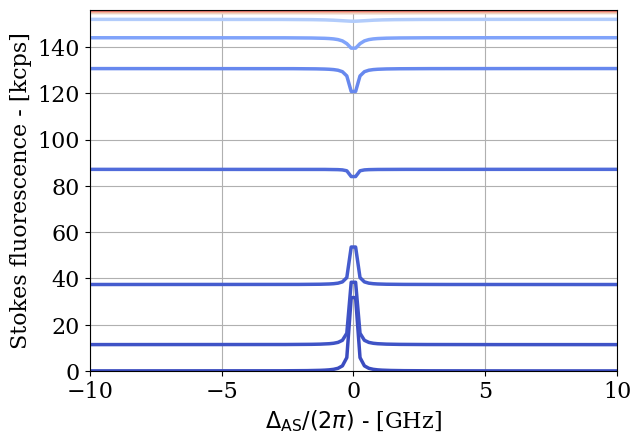

In [195]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}

# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

# Prepare color mapping
norm = Normalize(vmin=min(arr_gS), vmax=max(arr_gS))  # Normalize gS values
cmap = plt.get_cmap('coolwarm')  # Color map transitioning from blue to red
p_click = 0.005
max_y = np.amax(p_click * 10e6 * gamma_opt / (2 * np.pi) * np.asarray(arr_gS_rho))

# Create the plot
plt.figure(figsize=(8, 6))

for indxS, gS in enumerate(arr_gS):
    color = cmap(norm(gS))  # Get color for the current gS value
    plt.plot(arr_Delta / (2 * np.pi), p_click * 10e6 * gamma_opt / (2 * np.pi) * arr_gS_rho[indxS],
             label=r'$g_{\rm AS}/(2\pi)= %.0f$ GHz' % (gS / (2 * np.pi)), linewidth=2.5, color=color)

# Add labels and grid
plt.xlim((-10, 10))
plt.ylim((0,max_y))
plt.xlabel(r'$\Delta_{\rm AS}/(2\pi)$ - [GHz]', fontdict=font)
plt.ylabel(r'Stokes fluorescence - [kcps]', fontdict=font)
plt.grid()


# Add color bar to indicate gS values
#sm = ScalarMappable(norm=norm, cmap=cmap)
#sm.set_array(arr_gS)
#cbar = plt.colorbar(sm)
#cbar.set_label(r'$g_{\rm S}$ - [GHz]', fontdict=font)

# Add legend
#plt.legend( fontsize=12)

# Adjust layout
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)  # Convert mm to inches
plt.tight_layout()

#plt.savefig('fluo_sweep_delta0_gamma0_%.2f_eta_%.2f_Om0_%.2f_pclick_%.3f.pdf' % (gamma_opt, eta, Om_opt, p_click))
# Show the plot
plt.show()

In [27]:
#DELTA_0 FREQUENCY SWEEP (SWEEP ON OMEGA_ZPL)


#gS = 2*np.pi * 15.0

arr_gS = 2*np.pi * np.array([.1,8,10,15])
arr_gS_rho = []
arr_gS_g2 = []
for indxS, gS in enumerate(arr_gS):

    gamma_opt = 2*np.pi * 0.04    #frequencies in GHz
    Delta_opt = 2*np.pi * 0
    kappa_opt = 2*np.pi * .01


    gamma_v = 2*np.pi * 10.
    Delta_v = 2*np.pi * 0
    n_th = 0
    kappa_v = 2*np.pi * 1.

    Nvib = 20
    sig = tensor( sigmam(), qeye(Nvib))
    b = tensor(qeye(2), destroy(Nvib))


    gAS_incoh = 2*np.pi * 0.0
    Gamma_plus = gAS_incoh**2/(2*gamma_v) 


    Om_opt = 2*np.pi * .0
    Om_THz =  2*np.pi * 0.

    arr_Delta = 2*np.pi * np.linspace(-20., 20., 200)

    arr_g2 = []
    arr_rho_ee = []
    for Delta_opt in arr_Delta:
        T_v = 2*np.pi/gamma_v*0+.1
    
        theta = np.pi/2 * .5
        H0 = 0*b.dag()*b + Delta_opt*sig.dag()*sig + Om_opt*( sig + sig.dag() ) + Om_THz*( np.exp(1j*theta)*b + np.exp(-1j*theta)*b.dag() )

        H_S = gS/2.*( sig*b.dag() + sig.dag()*b )
        H_AS = gS/2.*( sig*b + sig.dag()*b.dag() )

        H = H0 + H_S + H_AS
        c_jumps = [ np.sqrt(gamma_v*(1 + n_th))*b, np.sqrt(gamma_v*(n_th))*b.dag(), np.sqrt(kappa_v)*b.dag()*b, np.sqrt(gamma_opt)*sig, np.sqrt(Gamma_plus)*sig.dag(), np.sqrt(kappa_opt)*sig.dag()*sig ]

        rho_ss = steadystate(H, c_jumps)
        
        eta = 0.3
        c = sig *eta*b.dag()
        rho_ee = expect(c.dag()*c, rho_ss)
        arr_rho_ee.append(np.abs(rho_ee))
        Ntau = 1000
        G2 = np.zeros(Ntau)
        tau = np.linspace(0.0001,50*T_v, Ntau)
        #G2 = correlation_3op_1t(H, rho_ss, tau, c_jumps, c.dag(), c.dag()*c, c)

        g2 = np.abs(G2)/np.abs(rho_ee)**2
        arr_g2.append(g2)
    #arr_g2 = np.asarray(arr_g2)
    #arr_rho_ee = np.asarray(arr_rho_ee)
    arr_gS_rho.append( np.asarray(arr_rho_ee) )
    arr_gS_g2.append( np.asarray(arr_g2) )

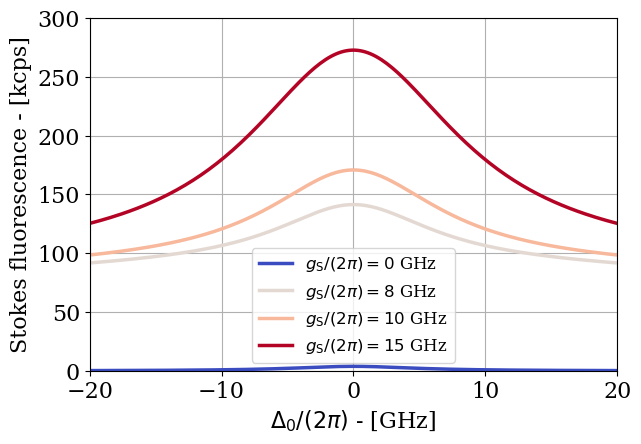

In [28]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}

# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

# Prepare color mapping
norm = Normalize(vmin=min(arr_gS), vmax=max(arr_gS))  # Normalize gS values
cmap = plt.get_cmap('coolwarm')  # Color map transitioning from blue to red

# Create the plot
plt.figure(figsize=(8, 6))
p_click = 0.005
for indxS, gS in enumerate(arr_gS):
    color = cmap(norm(gS))  # Get color for the current gS value
    plt.plot(arr_Delta / (2 * np.pi), p_click * 10e6 * gamma_opt / (2 * np.pi) * arr_gS_rho[indxS],
             label=r'$g_{\rm S}/(2\pi)= %.0f$ GHz' % (gS / (2 * np.pi)), linewidth=2.5, color=color)

# Add labels and grid
plt.xlim((-20, 20))
plt.ylim((0,300))
plt.xlabel(r'$\Delta_0/(2\pi)$ - [GHz]', fontdict=font)
plt.ylabel(r'Stokes fluorescence - [kcps]', fontdict=font)
plt.grid()


# Add color bar to indicate gS values
#sm = ScalarMappable(norm=norm, cmap=cmap)
#sm.set_array(arr_gS)
#cbar = plt.colorbar(sm)
#cbar.set_label(r'$g_{\rm S}$ - [GHz]', fontdict=font)

# Add legend
plt.legend( fontsize=12)

# Adjust layout
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)  # Convert mm to inches
plt.tight_layout()

#plt.savefig('fluo_sweep_delta0_gamma0_%.2f_eta_%.2f_Om0_%.2f_pclick_%.3f.pdf' % (gamma_opt, eta, Om_opt, p_click))
# Show the plot
plt.show()

In [21]:
#DELTA_v FREQUENCY SWEEP (SWEEP ON OMEGA_S)


#gS = 2*np.pi * 15.0

arr_gS = 2*np.pi * np.array([.1,8,10,15])
arr_gS_rho = []
arr_gS_g2 = []
for indxS, gS in enumerate(arr_gS):

    gamma_opt = 2*np.pi * 0.04    #frequencies in GHz
    Delta_opt = 2*np.pi * 0
    kappa_opt = 2*np.pi * .01


    gamma_v = 2*np.pi * 10.
    Delta_v = 2*np.pi * 0
    n_th = 0
    kappa_v = 2*np.pi * 1.

    Nvib = 4
    sig = tensor( sigmam(), qeye(Nvib))
    b = tensor(qeye(2), destroy(Nvib))


    gAS_incoh = 2*np.pi * 0.0
    Gamma_plus = gAS_incoh**2/(2*gamma_v) 


    Om_opt = 2*np.pi * .5
    Om_THz =  2*np.pi * 0.

    arr_Delta = 2*np.pi * np.linspace(-20., 20., 200)

    arr_g2 = []
    arr_rho_ee = []
    for Delta_opt in arr_Delta:
        T_v = 2*np.pi/gamma_v*0+.1
    
        theta = np.pi/2 * .5
        H0 = Delta_opt*b.dag()*b + 0*sig.dag()*sig + Om_opt*( sig + sig.dag() ) + Om_THz*( np.exp(1j*theta)*b + np.exp(-1j*theta)*b.dag() )

        H_S = gS/2.*( sig*b.dag() + sig.dag()*b )
        #H_S = gS/2.*( sig*b + sig.dag()*b.dag() )

        H = H0 + H_S
        c_jumps = [ np.sqrt(gamma_v*(1 + n_th))*b, np.sqrt(gamma_v*(n_th))*b.dag(), np.sqrt(kappa_v)*b.dag()*b, np.sqrt(gamma_opt)*sig, np.sqrt(Gamma_plus)*sig.dag(), np.sqrt(kappa_opt)*sig.dag()*sig ]

        rho_ss = steadystate(H, c_jumps)
        
        eta = 0.3
        c = sig *eta*b.dag()
        rho_ee = expect(c.dag()*c, rho_ss)
        arr_rho_ee.append(np.abs(rho_ee))
        Ntau = 1000
        G2 = np.zeros(Ntau)
        tau = np.linspace(0.0001,50*T_v, Ntau)
        #G2 = correlation_3op_1t(H, rho_ss, tau, c_jumps, c.dag(), c.dag()*c, c)

        g2 = np.abs(G2)/np.abs(rho_ee)**2
        arr_g2.append(g2)
    #arr_g2 = np.asarray(arr_g2)
    #arr_rho_ee = np.asarray(arr_rho_ee)
    arr_gS_rho.append( np.asarray(arr_rho_ee) )
    arr_gS_g2.append( np.asarray(arr_g2) )

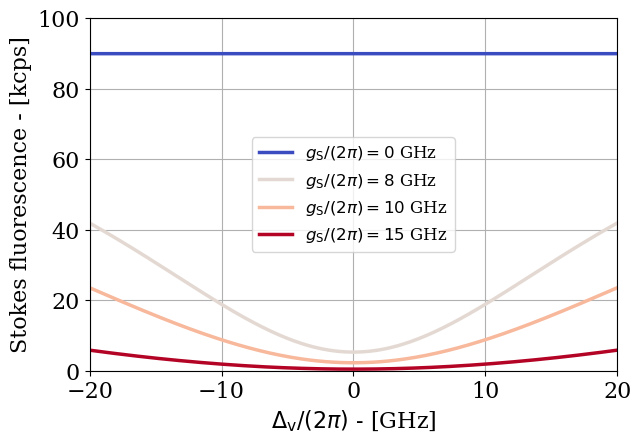

In [22]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}

# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

# Prepare color mapping
norm = Normalize(vmin=min(arr_gS), vmax=max(arr_gS))  # Normalize gS values
cmap = plt.get_cmap('coolwarm')  # Color map transitioning from blue to red

# Create the plot
plt.figure(figsize=(8, 6))
p_click = 0.005
for indxS, gS in enumerate(arr_gS):
    color = cmap(norm(gS))  # Get color for the current gS value
    plt.plot(arr_Delta / (2 * np.pi), p_click * 10e6 * gamma_opt / (2 * np.pi) * arr_gS_rho[indxS],
             label=r'$g_{\rm S}/(2\pi)= %.0f$ GHz' % (gS / (2 * np.pi)), linewidth=2.5, color=color)

# Add labels and grid
plt.xlim((-20, 20))
plt.ylim((0,100))
plt.xlabel(r'$\Delta_{\rm v}/(2\pi)$ - [GHz]', fontdict=font)
plt.ylabel(r'Stokes fluorescence - [kcps]', fontdict=font)
plt.grid()


# Add color bar to indicate gS values
#sm = ScalarMappable(norm=norm, cmap=cmap)
#sm.set_array(arr_gS)
#cbar = plt.colorbar(sm)
#cbar.set_label(r'$g_{\rm S}$ - [GHz]', fontdict=font)

# Add legend
plt.legend( fontsize=12)

# Adjust layout
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)  # Convert mm to inches
plt.tight_layout()

plt.savefig('fluo_sweep_delta_v_gamma0_%.2f_eta_%.2f_Om0_%.2f_pclick_%.3f.pdf' % (gamma_opt, eta, Om_opt, p_click))
# Show the plot
plt.show()

In [23]:
#DELTA_v FREQUENCY SWEEP (SWEEP ON OMEGA_S)


#gS = 2*np.pi * 15.0

arr_gS = 2*np.pi * np.array([.1,8,10,15])
arr_gS_rho = []
arr_gS_g2 = []
for indxS, gS in enumerate(arr_gS):

    gamma_opt = 2*np.pi * 0.04    #frequencies in GHz
    Delta_opt = 2*np.pi * 0
    kappa_opt = 2*np.pi * .01


    gamma_v = 2*np.pi * 10.
    Delta_v = 2*np.pi * 0
    n_th = 0
    kappa_v = 2*np.pi * 1.

    Nvib = 4
    sig = tensor( sigmam(), qeye(Nvib))
    b = tensor(qeye(2), destroy(Nvib))


    gAS_incoh = 2*np.pi * 0.0
    Gamma_plus = gAS_incoh**2/(2*gamma_v) 


    Om_opt = 2*np.pi * 2.
    Om_THz =  2*np.pi * 0.

    arr_Delta = 2*np.pi * np.linspace(-20., 20., 200)

    arr_g2 = []
    arr_rho_ee = []
    for Delta_opt in arr_Delta:
        T_v = 2*np.pi/gamma_v*0+.1
    
        theta = np.pi/2 * .5
        H0 = Delta_opt*b.dag()*b + 0*sig.dag()*sig + Om_opt*( sig + sig.dag() ) + Om_THz*( np.exp(1j*theta)*b + np.exp(-1j*theta)*b.dag() )

        H_S = gS/2.*( sig*b.dag() + sig.dag()*b )
        #H_S = gS/2.*( sig*b + sig.dag()*b.dag() )

        H = H0 + H_S
        c_jumps = [ np.sqrt(gamma_v*(1 + n_th))*b, np.sqrt(gamma_v*(n_th))*b.dag(), np.sqrt(kappa_v)*b.dag()*b, np.sqrt(gamma_opt)*sig, np.sqrt(Gamma_plus)*sig.dag(), np.sqrt(kappa_opt)*sig.dag()*sig ]

        rho_ss = steadystate(H, c_jumps)
        
        eta = 0.3
        c = sig *eta*b.dag()
        rho_ee = expect(c.dag()*c, rho_ss)
        arr_rho_ee.append(np.abs(rho_ee))
        Ntau = 1000
        G2 = np.zeros(Ntau)
        tau = np.linspace(0.0001,50*T_v, Ntau)
        #G2 = correlation_3op_1t(H, rho_ss, tau, c_jumps, c.dag(), c.dag()*c, c)

        g2 = np.abs(G2)/np.abs(rho_ee)**2
        arr_g2.append(g2)
    #arr_g2 = np.asarray(arr_g2)
    #arr_rho_ee = np.asarray(arr_rho_ee)
    arr_gS_rho.append( np.asarray(arr_rho_ee) )
    arr_gS_g2.append( np.asarray(arr_g2) )

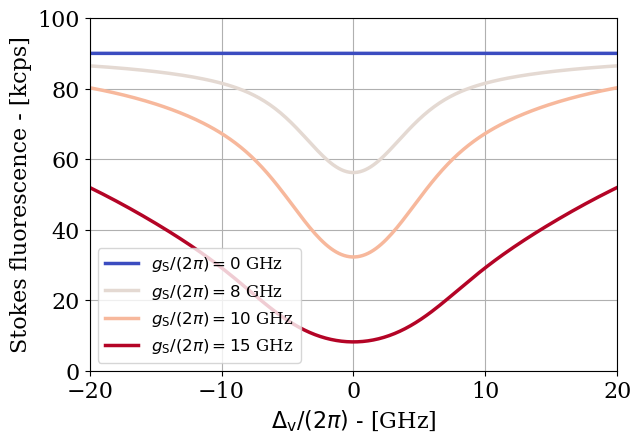

In [24]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}

# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

# Prepare color mapping
norm = Normalize(vmin=min(arr_gS), vmax=max(arr_gS))  # Normalize gS values
cmap = plt.get_cmap('coolwarm')  # Color map transitioning from blue to red

# Create the plot
plt.figure(figsize=(8, 6))
p_click = 0.005
for indxS, gS in enumerate(arr_gS):
    color = cmap(norm(gS))  # Get color for the current gS value
    plt.plot(arr_Delta / (2 * np.pi), p_click * 10e6 * gamma_opt / (2 * np.pi) * arr_gS_rho[indxS],
             label=r'$g_{\rm S}/(2\pi)= %.0f$ GHz' % (gS / (2 * np.pi)), linewidth=2.5, color=color)

# Add labels and grid
plt.xlim((-20, 20))
plt.ylim((0,100))
plt.xlabel(r'$\Delta_{\rm v}/(2\pi)$ - [GHz]', fontdict=font)
plt.ylabel(r'Stokes fluorescence - [kcps]', fontdict=font)
plt.grid()


# Add color bar to indicate gS values
#sm = ScalarMappable(norm=norm, cmap=cmap)
#sm.set_array(arr_gS)
#cbar = plt.colorbar(sm)
#cbar.set_label(r'$g_{\rm S}$ - [GHz]', fontdict=font)

# Add legend
plt.legend( fontsize=12)

# Adjust layout
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)  # Convert mm to inches
plt.tight_layout()

plt.savefig('fluo_sweep_delta_v_gamma0_%.2f_eta_%.2f_Om0_%.2f_pclick_%.3f.pdf' % (gamma_opt, eta, Om_opt, p_click))
# Show the plot
plt.show()